In [0]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
num_classes=10

In [0]:
label_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
print(y_train[2])

[9]


In [0]:
X_train_n=X_train.copy()
y_train_n=y_train.copy()

In [0]:
for i in range(15):
    print((label_names[y_train[i,0]]))

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat
deer
horse
horse
bird
truck


In [0]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
################ One Hot Encoding by np.eye ################

In [0]:
y_train_n.shape

(50000, 1)

In [0]:
y_train_n[0]

array([6], dtype=uint8)

In [0]:
hihi=np.eye(10)[y_train_n]
hihi[0:10]

array([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]])

In [0]:
X=tf.placeholder(tf.float32,[None,32,32,3])
Y=tf.placeholder(tf.float32,[None,10])
prob=tf.placeholder(tf.float32)

In [0]:
W1=tf.Variable(tf.random_normal([3,3,3,32],stddev=0.01))
L1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.dropout(L1,prob)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(L1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("MaxPool:0", shape=(?, 16, 16, 32), dtype=float32)


In [0]:
### ??? 이해필요 ###
W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.dropout(L2,prob)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(L2)

Tensor("MaxPool_1:0", shape=(?, 8, 8, 64), dtype=float32)


In [0]:
W3 = tf.Variable(tf.random_normal([8 * 8 * 64, 128], stddev=0.01))
L3 = tf.reshape(L2, [-1, 8 *8 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3,prob)
print(L3)

Tensor("dropout_2/mul_1:0", shape=(?, 128), dtype=float32)


In [0]:
W4=tf.Variable(tf.random_normal([128,10],stddev=0.01))
model=tf.matmul(L3,W4)
model

<tf.Tensor 'MatMul_1:0' shape=(?, 10) dtype=float32>

In [0]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
iteration=int(len(X_train)/batch_size)

for epoch in range(15):
    total_cost=0
    for i in range(iteration):
        batch_xs=X_train[i*batch_size:(i+1)*batch_size]
        batch_ys=y_train[i*batch_size:(i+1)*batch_size]
        _,cost_val=sess.run([optimizer,cost],
                           feed_dict={X:batch_xs, Y:batch_ys, prob:0.8})
        total_cost += cost_val
    print('epoch : {} , Average Cost : {}'.format(epoch,total_cost/iteration))
print('Complete')

epoch : 0 , Average Cost : 1.57955845952034
epoch : 1 , Average Cost : 1.2217029526233674
epoch : 2 , Average Cost : 1.0820782341957091
epoch : 3 , Average Cost : 0.9985529297590255
epoch : 4 , Average Cost : 0.9352628662586212
epoch : 5 , Average Cost : 0.9071403684616088
epoch : 6 , Average Cost : 0.8586827133893966
epoch : 7 , Average Cost : 0.8311281710863113
epoch : 8 , Average Cost : 0.7997108981609344
epoch : 9 , Average Cost : 0.7756203565597534
epoch : 10 , Average Cost : 0.7630719307661057
epoch : 11 , Average Cost : 0.728650972366333
epoch : 12 , Average Cost : 0.722821711242199
epoch : 13 , Average Cost : 0.7022755421996116
epoch : 14 , Average Cost : 0.6853579646348953
Complete


In [0]:
def next_batch(start, num, data, labels):
    data_X = data[start:start+num]
    data_y = labels[start:start+num]
    return np.asarray(data_X), np.asarray(data_y)

In [0]:
batch_xs, batch_ys = next_batch(0,30000, X_train, y_train)

In [0]:
is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('정확도:',sess.run(accuracy,
                      feed_dict={X:batch_xs,
                                Y:batch_ys,
                                 prob:1}))

정확도: 0.79


In [0]:
is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('test정확도:',sess.run(accuracy,
                      feed_dict={X:X_test.reshape(-1,32,32,3),
                                Y:y_test,
                                prob:1}))

test정확도: 0.6821


In [0]:
import cv2

In [0]:
image_w=32
image_h=32


In [0]:
img=cv2.imread('./ap.jpg')

In [0]:
print(img.shape)

(168, 300, 3)


In [0]:
img=cv2.resize(img,None,fx=image_w/img.shape[1],fy=image_h/img.shape[0])

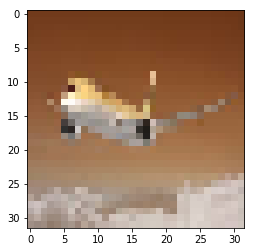

In [0]:
plt.imshow(img)

In [0]:
img.shape

(32, 32, 3)

In [0]:
img_re=img.reshape(1,32*32*3)
print(img_re.shape)
img_re

(1, 3072)


array([[113,  58,  27, ..., 207, 197, 190]], dtype=uint8)

In [0]:
result = tf.argmax(model, 1)
res_idx = sess.run(result, feed_dict={X: img_re.reshape(-1,32,32,3),prob:1})
print('예측 레이블 :', label_names[res_idx[0]])

예측 레이블 : bird


In [0]:
## 1차원 array
np_1=np.array([1,2,3,4,5])
print(np_1.shape)

(5,)


In [0]:
## 2차원 array
np_2=np.array([[1,2,3,4,5],
             [2,3,4,5,6]])
print(np_2.shape)

(2, 5)


In [0]:
## 3차원 array
np_3=np.array([[[1,2,3,4,5],
             [2,3,4,5,6]],
             
              [[1,2,3,4,5],
             [2,3,4,5,6]],
             
             [[1,2,3,4,5],
             [2,3,4,5,6]]])
print(np_3.shape)

(3, 2, 5)


In [0]:
## 4차원 array
np_4=np.array([[[[1,2,3,4,5],
             [2,3,4,5,6]],
             
              [[1,2,3,4,5],
             [2,3,4,5,6]],
             
             [[1,2,3,4,5],
             [2,3,4,5,6]]],
             
             [[[1,2,3,4,5],
             [2,3,4,5,6]],
             
              [[1,2,3,4,5],
             [2,3,4,5,6]],
             
             [[1,2,3,4,5],
             [2,3,4,5,6]]],
             
             [[[1,2,3,4,5],
             [2,3,4,5,6]],
             
              [[1,2,3,4,5],
             [2,3,4,5,6]],
             
             [[1,2,3,4,5],
             [2,3,4,5,6]]],
             
             [[[1,2,3,4,5],
             [2,3,4,5,6]],
             
              [[1,2,3,4,5],
             [2,3,4,5,6]],
             
             [[1,2,3,4,5],
             [2,3,4,5,6]]]])
print(np_4.shape)

(4, 3, 2, 5)


In [0]:
hi=np.zeros([2,3,4,5])

In [0]:
hi

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]])

In [0]:
hi1=np.ones([1,2,3])

In [0]:
hi2=np.ones([2,3,4])

In [0]:
hi3=np.matmul(hi1,hi2)

In [0]:
hi3.shape

(2, 2, 4)

In [0]:
bye1=np.ones([100,32,32,3])

In [0]:
bye2=np.ones([100,32,3,64])

In [0]:
bye3=np.matmul(bye1,bye2)
bye3.shape

(100, 32, 32, 64)

In [0]:
chi1=tf.random_normal([50,5,30,64])

In [0]:
chi2=tf.constant(5.0,shape=[200,36,84,30])

In [0]:
chi3=tf.nn.conv2d(chi2,chi1,padding='SAME')